In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import os
os.chdir('/content/gdrive/MyDrive/ViralMut/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import warnings

warnings.filterwarnings('ignore')

!mkdir -p ~/.fonts
!cp arial.ttf ~/.fonts/
!fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
from matplotlib import font_manager as fm

font_dir = os.path.join(os.environ['HOME'], '.fonts')
os.makedirs(font_dir, exist_ok=True)
font_name = 'arial.ttf'
font_path = os.path.join(font_dir, font_name)
fm.fontManager.addfont(font_path)

!cp {font_name} {font_dir}

## 1.ClinVar

In [4]:
import pandas as pd

Pathogenic_prot = pd.read_csv('./LLR/pathogenic_LLR_results.csv')
Pathogenic_gene = pd.read_csv('./LLR/pathogenic_LLR_CaLM_results.csv')
benign_prot = pd.read_csv('./LLR/benign_LLR_results.csv')
benign_gene = pd.read_csv('./LLR/benign_LLR_CaLM_results.csv')
likely_pathogenic_prot = pd.read_csv('./LLR/likely_pathogenic_LLR_results.csv')
likely_pathogenic_gene = pd.read_csv('./LLR/likely_pathogenic_LLR_CaLM_results.csv')
likely_benign_prot = pd.read_csv('./LLR/likely_benign_LLR_results.csv')
likely_benign_gene = pd.read_csv('./LLR/likely_benign_LLR_CaLM_results.csv')

Pathogenic_prot = Pathogenic_prot.add_suffix('_prot')
Pathogenic_gene = Pathogenic_gene.add_suffix('_gene')
benign_prot = benign_prot.add_suffix('_prot')
benign_gene = benign_gene.add_suffix('_gene')
likely_pathogenic_prot = likely_pathogenic_prot.add_suffix('_prot')
likely_pathogenic_gene = likely_pathogenic_gene.add_suffix('_gene')
likely_benign_prot = likely_benign_prot.add_suffix('_prot')
likely_benign_gene = likely_benign_gene.add_suffix('_gene')

merge_Pathogenic = pd.merge(Pathogenic_prot, Pathogenic_gene, left_index=True, right_index=True)
merge_likely_pathogenic = pd.merge(likely_pathogenic_prot, likely_pathogenic_gene, left_index=True, right_index=True)
merge_benign = pd.merge(benign_prot, benign_gene, left_index=True, right_index=True)
merge_likely_benign = pd.merge(likely_benign_prot, likely_benign_gene, left_index=True, right_index=True)

In [5]:
nonsense_Pathogenic = merge_Pathogenic[merge_Pathogenic['Mut_prot'].isna() & merge_Pathogenic['LLR_gene'].notna()]
nonsense_likely_pathogenic = merge_likely_pathogenic[merge_likely_pathogenic['Mut_prot'].isna() & merge_likely_pathogenic['LLR_gene'].notna()]
nonsense_benign = merge_benign[merge_benign['Mut_prot'].isna() & merge_benign['LLR_gene'].notna()]
nonsense_likely_benign = merge_likely_benign[merge_likely_benign['Mut_prot'].isna() & merge_likely_benign['LLR_gene'].notna()]

nonsense_Pathogenic.to_csv('./Results/LLR/nonsense_pathogenic.csv', index=False)
nonsense_likely_pathogenic.to_csv('./Results/LLR/nonsense_likely_pathogenic.csv', index=False)
nonsense_benign.to_csv('./Results/LLR/nonsense_benign.csv', index=False)
nonsense_likely_benign.to_csv('./Results/LLR/nonsense_likely_benign.csv', index=False)

nonsense_Pathogenic_gene = nonsense_Pathogenic['LLR_gene'].to_list()
nonsense_benign_gene = nonsense_benign['LLR_gene'].to_list()
nonsense_likely_Pathogenic_gene = nonsense_likely_pathogenic['LLR_gene'].to_list()
nonsense_likely_benign_gene = nonsense_likely_benign['LLR_gene'].to_list()

In [6]:
Pathogenic_gene = pd.read_csv('./LLR/pathogenic_LLR_CaLM_results_synonymous.csv')
benign_gene = pd.read_csv('./LLR/benign_LLR_CaLM_results_synonymous.csv')
likely_pathogenic_gene = pd.read_csv('./LLR/likely_pathogenic_LLR_CaLM_results_synonymous.csv')
likely_benign_gene = pd.read_csv('./LLR/likely_benign_LLR_CaLM_results_synonymous.csv')

synonymous_Pathogenic_gene = Pathogenic_gene.loc[Pathogenic_gene['LLR'].notna(), 'LLR'].tolist()
synonymous_benign_gene = benign_gene.loc[benign_gene['LLR'].notna(), 'LLR'].tolist()
synonymous_likely_Pathogenic_gene = likely_pathogenic_gene.loc[likely_pathogenic_gene['LLR'].notna(), 'LLR'].tolist()
synonymous_likely_benign_gene = likely_benign_gene.loc[likely_benign_gene['LLR'].notna(), 'LLR'].tolist()

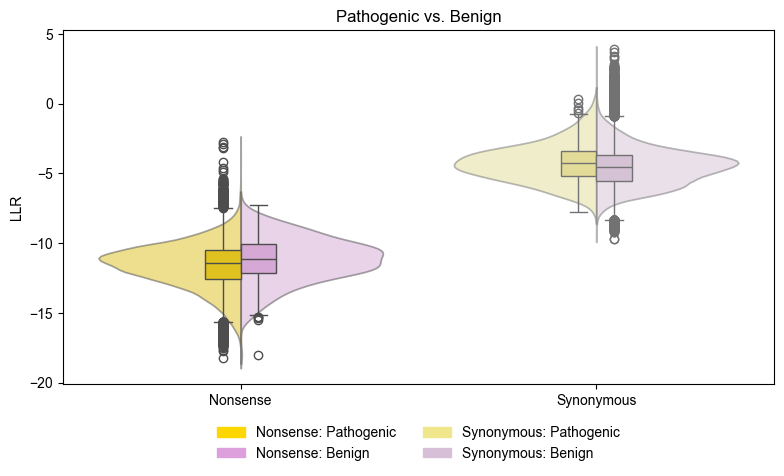

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


data = []

data.extend([{'Type': 'Nonsense', 'Class': 'Pathogenic', 'Score': s} for s in nonsense_Pathogenic_gene + nonsense_likely_Pathogenic_gene])
data.extend([{'Type': 'Nonsense', 'Class': 'Benign', 'Score': s} for s in nonsense_benign_gene + nonsense_likely_benign_gene])
data.extend([{'Type': 'Synonymous', 'Class': 'Pathogenic', 'Score': s} for s in synonymous_Pathogenic_gene + synonymous_likely_Pathogenic_gene])
data.extend([{'Type': 'Synonymous', 'Class': 'Benign', 'Score': s} for s in synonymous_benign_gene + synonymous_likely_benign_gene])

df_plot = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
ax = plt.gca()

plt.rcParams.update({
        'font.size': 12,
        'axes.titlesize': 12,
        'axes.labelsize': 12,
        'legend.fontsize': 10,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial']
    })


c_non_pathogenic = 'gold'
c_non_benign = 'plum'


c_syn_pathogenic = 'khaki'
c_syn_benign = 'thistle'


palette_nonsense = {'Pathogenic': c_non_pathogenic, 'Benign': c_non_benign}
palette_syn = {'Pathogenic': c_syn_pathogenic, 'Benign': c_syn_benign}


x_order = ['Nonsense', 'Synonymous']
hue_order = ['Pathogenic', 'Benign']


df_non = df_plot[df_plot['Type'] == 'Nonsense']
sns.violinplot(data=df_non, x='Type', y='Score', hue='Class',
               order=x_order, hue_order=hue_order,
               split=True, inner=None, palette=palette_nonsense, alpha=0.5, ax=ax)

sns.boxplot(data=df_non, x='Type', y='Score', hue='Class',
            order=x_order, hue_order=hue_order,
            dodge=True, width=0.2, palette=palette_nonsense, ax=ax,
            boxprops={'zorder': 2})


df_syn = df_plot[df_plot['Type'] == 'Synonymous']
sns.violinplot(data=df_syn, x='Type', y='Score', hue='Class',
               order=x_order, hue_order=hue_order,
               split=True, inner=None, palette=palette_syn, alpha=0.5, ax=ax)

sns.boxplot(data=df_syn, x='Type', y='Score', hue='Class',
            order=x_order, hue_order=hue_order,
            dodge=True, width=0.2, palette=palette_syn, ax=ax,
            boxprops={'zorder': 2})


legend_handles = [
    mpatches.Patch(color=c_non_pathogenic, label='Nonsense: Pathogenic'),
    mpatches.Patch(color=c_non_benign, label='Nonsense: Benign'),
    mpatches.Patch(color=c_syn_pathogenic, label='Synonymous: Pathogenic'),
    mpatches.Patch(color=c_syn_benign, label='Synonymous: Benign')
]


plt.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.25),
           ncol=2,
           frameon=False)


plt.title('Pathogenic vs. Benign')
plt.ylabel('LLR')
plt.xlabel('')
plt.tight_layout()
plt.show()

## 2. ClinMAVE

In [8]:
sy_normal_gene = pd.read_csv('./ClinMAVE/LLR/sy_normal_LLR_CaLM_results.csv')['LLR'].to_list()
sy_lof_gene = pd.read_csv('./ClinMAVE/LLR/sy_lof_LLR_CaLM_results.csv')['LLR'].to_list()
sy_gof_gene = pd.read_csv('./ClinMAVE/LLR/sy_gof_LLR_CaLM_results.csv')['LLR'].to_list()

nonsense_normal_gene = pd.read_csv('./ClinMAVE/LLR/nonsense_normal_LLR_CaLM_results.csv')['LLR'].to_list()
nonsense_lof_gene = pd.read_csv('./ClinMAVE/LLR/nonsense_lof_LLR_CaLM_results.csv')['LLR'].to_list()
nonsense_gof_gene = pd.read_csv('./ClinMAVE/LLR/nonsense_gof_LLR_CaLM_results.csv')['LLR'].to_list()

missense_normal_gene = pd.read_csv('./ClinMAVE/LLR/normal_LLR_CaLM_results.csv')['LLR'].to_list()
missense_lof_gene = pd.read_csv('./ClinMAVE/LLR/lof_LLR_CaLM_results.csv')['LLR'].to_list()
missense_gof_gene = pd.read_csv('./ClinMAVE/LLR/gof_LLR_CaLM_results.csv')['LLR'].to_list()

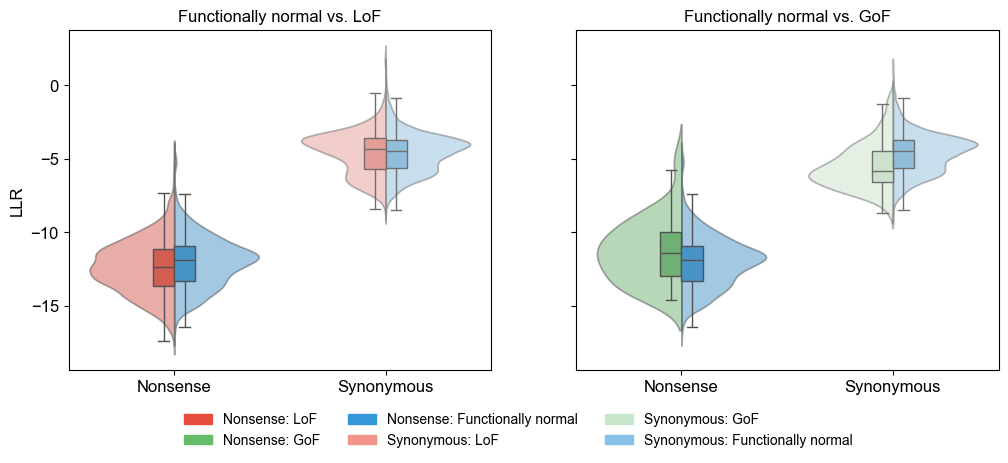

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data_lof = []
data_lof.extend([{'Type': 'Nonsense', 'Class': 'LoF', 'Score': s} for s in nonsense_lof_gene])
data_lof.extend([{'Type': 'Nonsense', 'Class': 'Functionally normal', 'Score': s} for s in nonsense_normal_gene])
data_lof.extend([{'Type': 'Synonymous', 'Class': 'LoF', 'Score': s} for s in sy_lof_gene])
data_lof.extend([{'Type': 'Synonymous', 'Class': 'Functionally normal', 'Score': s} for s in sy_normal_gene])
df_lof = pd.DataFrame(data_lof)


data_gof = []
data_gof.extend([{'Type': 'Nonsense', 'Class': 'GoF', 'Score': s} for s in nonsense_gof_gene])
data_gof.extend([{'Type': 'Nonsense', 'Class': 'Functionally normal', 'Score': s} for s in nonsense_normal_gene])
data_gof.extend([{'Type': 'Synonymous', 'Class': 'GoF', 'Score': s} for s in sy_gof_gene])
data_gof.extend([{'Type': 'Synonymous', 'Class': 'Functionally normal', 'Score': s} for s in sy_normal_gene])
df_gof = pd.DataFrame(data_gof)


plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial']
})


c_non_norm = '#3498db'
c_syn_norm = '#85c1e9'
c_non_lof = '#e74c3c'
c_syn_lof = '#f1948a'
c_non_gof = '#66bb6a'
c_syn_gof = '#c8e6c9'

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
x_order = ['Nonsense', 'Synonymous']


ax1 = axes[0]
palette_lof = {'LoF': c_non_lof, 'Functionally normal': c_non_norm}
palette_syn_lof = {'LoF': c_syn_lof, 'Functionally normal': c_syn_norm}
hue_order_lof = ['LoF', 'Functionally normal']


sns.violinplot(data=df_lof[df_lof['Type'] == 'Nonsense'], x='Type', y='Score', hue='Class',
               order=x_order, hue_order=hue_order_lof, split=True, inner=None,
               palette=palette_lof, alpha=0.5, ax=ax1)
sns.boxplot(data=df_lof[df_lof['Type'] == 'Nonsense'], x='Type', y='Score', hue='Class',
            order=x_order, hue_order=hue_order_lof, dodge=True, width=0.2,
            palette=palette_lof, ax=ax1, boxprops={'zorder': 2}, showfliers=False)


sns.violinplot(data=df_lof[df_lof['Type'] == 'Synonymous'], x='Type', y='Score', hue='Class',
               order=x_order, hue_order=hue_order_lof, split=True, inner=None,
               palette=palette_syn_lof, alpha=0.5, ax=ax1)

sns.boxplot(data=df_lof[df_lof['Type'] == 'Synonymous'], x='Type', y='Score', hue='Class',
            order=x_order, hue_order=hue_order_lof, dodge=True, width=0.2,
            palette=palette_syn_lof, ax=ax1, boxprops={'zorder': 2}, showfliers=False)

ax1.set_title('Functionally normal vs. LoF')
ax1.set_ylabel('LLR')
ax1.set_xlabel('')
if ax1.legend_: ax1.legend_.remove()


ax2 = axes[1]
palette_gof = {'GoF': c_non_gof, 'Functionally normal': c_non_norm}
palette_syn_gof = {'GoF': c_syn_gof, 'Functionally normal': c_syn_norm}
hue_order_gof = ['GoF', 'Functionally normal']


sns.violinplot(data=df_gof[df_gof['Type'] == 'Nonsense'], x='Type', y='Score', hue='Class',
               order=x_order, hue_order=hue_order_gof, split=True, inner=None,
               palette=palette_gof, alpha=0.5, ax=ax2)
sns.boxplot(data=df_gof[df_gof['Type'] == 'Nonsense'], x='Type', y='Score', hue='Class',
            order=x_order, hue_order=hue_order_gof, dodge=True, width=0.2,
            palette=palette_gof, ax=ax2, boxprops={'zorder': 2}, showfliers=False)


sns.violinplot(data=df_gof[df_gof['Type'] == 'Synonymous'], x='Type', y='Score', hue='Class',
               order=x_order, hue_order=hue_order_gof, split=True, inner=None,
               palette=palette_syn_gof, alpha=0.5, ax=ax2)
sns.boxplot(data=df_gof[df_gof['Type'] == 'Synonymous'], x='Type', y='Score', hue='Class',
            order=x_order, hue_order=hue_order_gof, dodge=True, width=0.2,
            palette=palette_syn_gof, ax=ax2, boxprops={'zorder': 2}, showfliers=False)

ax2.set_title('Functionally normal vs. GoF')
ax2.set_ylabel('')
ax2.set_xlabel('')
if ax2.legend_: ax2.legend_.remove()


legend_handles = [

    mpatches.Patch(color=c_non_lof, label='Nonsense: LoF'),
    mpatches.Patch(color=c_non_gof, label='Nonsense: GoF'),
    mpatches.Patch(color=c_non_norm, label='Nonsense: Functionally normal'),

    mpatches.Patch(color=c_syn_lof, label='Synonymous: LoF'),
    mpatches.Patch(color=c_syn_gof, label='Synonymous: GoF'),
    mpatches.Patch(color=c_syn_norm, label='Synonymous: Functionally normal')
]


fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, 0.02),
           ncol=3,
           frameon=False)

plt.subplots_adjust(bottom=0.2)
plt.show()